In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import settings as settings
from itertools import product

In [20]:
# results = pd.read_csv('../results/results_scenario_1_steps30000_horizon24_expl0.01.csv')

EXPLORATION_RATE = .1
DISCOUNT_RATE = .9
LEARNING_RATE = .01
LEARNING_STEPS = 10000

# results = pd.read_csv(f'../results/results_s1_steps{LEARNING_STEPS}_horizon24_expl{EXPLORATION_RATE}_dis{DISCOUNT_RATE}_learning{LEARNING_RATE}.csv')



In [21]:

variable_combinations = list(product(settings.GRID_SEARCH_DISCOUNT_FACTORS, settings.GRID_SEARCH_LEARNING_RATES, settings.GRID_SEARCH_EXPLORATION_RATES))

# Dictionary to store the highest rolling_avg_reward for each combination
best_combination = {'combination': None, 'rolling_avg_reward': float('-inf')}

# Iterate over each combination
for combination in variable_combinations:
    # Read CSV file for the current combination
    file_path = f'results/results_s1_steps{settings.LEARNING_STEPS}_horizon24_expl{combination[2]}_dis{combination[0]}_learning{combination[1]}_0basereward.csv'
    
    try:
        df = pd.read_csv(file_path)

    except FileNotFoundError:
        print('file_path does not exist', file_path)
        continue

    # Extract rolling_avg_reward from the last row
    rolling_avg_reward = df['rolling_avg_reward'].iloc[-1]
    
    # Update best_combination if current combination has higher rolling_avg_reward
    if rolling_avg_reward > best_combination['rolling_avg_reward']:
        print("updating best reward to combination: ", combination)
        best_combination['combination'] = combination
        best_combination['rolling_avg_reward'] = rolling_avg_reward

# Print the combination with the highest rolling_avg_reward
best_combination_params = best_combination['combination']
print("Best Combination:", best_combination['combination'])
print("Highest Rolling Average Reward:", best_combination['rolling_avg_reward'])



updating best reward to combination:  (0.9, 0.1, 0.01)
updating best reward to combination:  (0.9, 0.1, 0.05)
updating best reward to combination:  (0.9, 0.1, 0.1)
updating best reward to combination:  (0.9, 0.1, 0.12)
updating best reward to combination:  (0.9, 0.05, 0.05)
updating best reward to combination:  (0.9, 0.05, 0.1)
updating best reward to combination:  (0.9, 0.05, 0.12)
updating best reward to combination:  (0.9, 0.01, 0.05)
updating best reward to combination:  (0.95, 0.01, 0.1)
Best Combination: (0.95, 0.01, 0.1)
Highest Rolling Average Reward: -1.1449999999999996


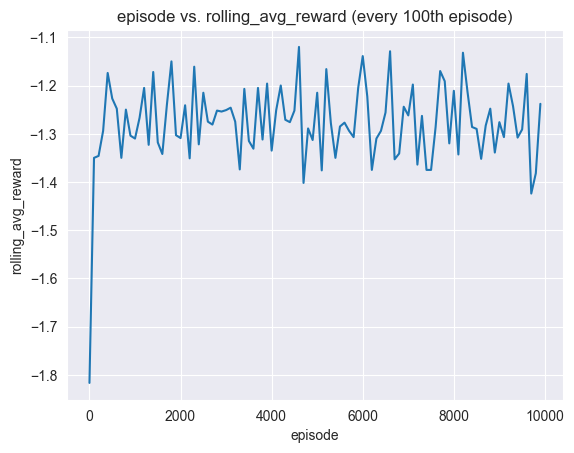

In [22]:
file_path = f'results/results_s1_steps{settings.LEARNING_STEPS}_horizon24_expl{best_combination_params[2]}_dis{best_combination_params[0]}_learning{best_combination_params[1]}_0basereward.csv'
best_hyperparam_results = pd.read_csv(file_path)
sns.set_style('darkgrid')
sns.lineplot(data=best_hyperparam_results.iloc[::100], x='episode', y='rolling_avg_reward', linestyle='-')
plt.xlabel('episode')
plt.ylabel('rolling_avg_reward')
plt.title('episode vs. rolling_avg_reward (every 100th episode)')
plt.grid(True)
plt.show()
